In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data = iBioGen.Core("DISES-Testing")
data.set_param("assembly_model", "filtering")
data.set_param("ntaxa", 100)
data.set_param("ecological_strength", "0.1")
data.set_param("rm_duplicates", True)
data.set_param("colrate", "0.0001-0.005")
data.set_param("J", "5000")
_ = data._simulate()

In [13]:
data.l._step_wf()
data.l.community

,coltime,local_abund,migrants,trait,tau,pi,is_founder
m33-2,0.0,113091.0,265.0,0.605351,99.0,0.016267,1.0
m40-1,0.0,38.0,808.0,-1.768437,99.0,0.000000,0.0
m40-2,0.0,3.0,232.0,-2.686309,98.0,0.000000,0.0
m42-1,69.0,35.0,14.0,1.290445,97.0,0.004000,0.0
m49-2,75.0,12.0,12.0,-0.603455,98.0,0.000000,0.0
m48-2,75.0,2.0,18.0,-1.557576,95.0,0.000000,0.0
m133-1,76.0,7.0,6.0,-0.489966,93.0,0.000000,0.0
m73-2,95.0,4.0,0.0,-0.622303,87.0,0.000000,0.0
m35-2,97.0,6.0,8.0,3.626828,99.0,0.000000,0.0
m106-1,99.0,4.0,0.0,-0.008839,91.0,0.000000,0.0


In [15]:
burnin = []
for idx in range(100):
    data.l._step_wf()
    h1 = iBioGen.util._generalized_hill_number(data.l.community["local_abund"])
    burnin.append(h1)
len(burnin)

100

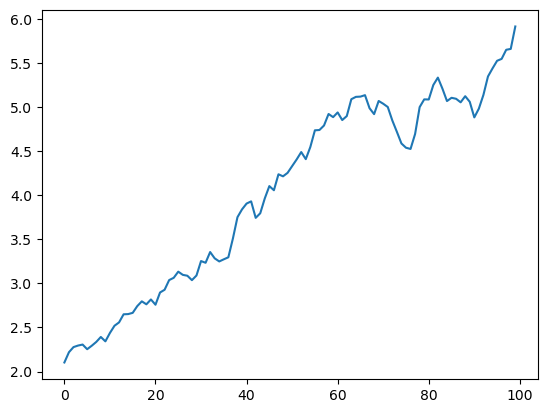

In [16]:
_ = plt.plot(burnin)
#plt.scatter([0,1], [1,2])
plt.show()

In [25]:
#
_t0_local = data.l.community.copy(deep=True)
_t0_local

,coltime,local_abund,migrants,trait,tau,pi,is_founder
m56-2,0.0,2887.0,144.0,4.926470,98.0,0.021071,1.0
m91-1,0.0,56.0,98.0,2.693355,98.0,0.004000,0.0
m72-2,2.0,252.0,208.0,4.946373,99.0,0.002667,0.0
m56-1,3.0,5.0,26.0,3.221020,23.0,0.000000,0.0
m83-1,5.0,226.0,235.0,2.669961,99.0,0.002667,0.0
m74-2,6.0,446.0,131.0,5.357123,98.0,0.003733,0.0
m83-2,7.0,114.0,269.0,3.075521,99.0,0.004000,0.0
m21-1,10.0,69.0,55.0,0.714760,97.0,0.000000,0.0
m81-2,64.0,13.0,68.0,0.144624,95.0,0.004000,0.0
m93-1,102.0,22.0,42.0,0.248268,86.0,0.000000,0.0


In [19]:
neutral_traj = []
data.l.community = _t0_local.copy(deep=True)
data.set_param("assembly_model", "neutral")
for idx in range(100):
    data.l._step_wf()
    h1 = iBioGen.util._generalized_hill_number(data.l.community["local_abund"])
    neutral_traj.append(h1)
len(neutral_traj)

comp_traj = []
data.set_param("assembly_model", "competition")
data.l.community = _t0_local.copy(deep=True)
for idx in range(100):
    data.l._step_wf()
    h1 = iBioGen.util._generalized_hill_number(data.l.community["local_abund"])
    comp_traj.append(h1)
len(comp_traj)

100

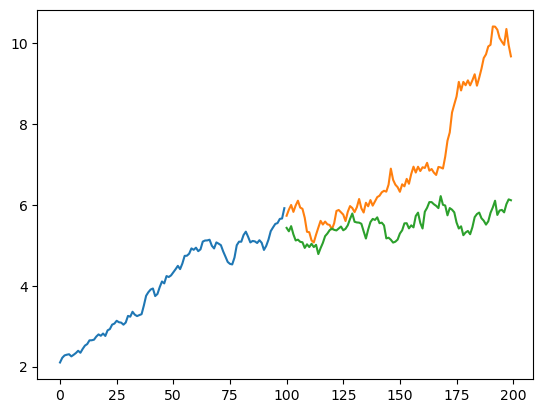

In [24]:
_ = plt.plot(range(len(burnin)), burnin)
_ = plt.plot(range(len(burnin), len(burnin)+len(neutral_traj)), neutral_traj)
_ = plt.plot(range(len(burnin), len(burnin)+len(comp_traj)), comp_traj)

#plt.scatter([0,1], [1,2])
plt.show()

In [47]:
data3 = iBioGen.Core("DISES-Testing")
data3.set_param("assembly_model", "neutral")
data3.set_param("ntaxa", 100)
data3.set_param("colrate", "0.005")
data3.set_param("J", "5000")
_ = data3._simulate()

['0.0085', '0.0045', '0.0032', '0.0022', '0.0016', '0.0014', '0.0014', '0.0011', '0.0009', '0.0008', '0.0008', '0.0007', '0.0004', '0.0004', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000']
['0.0182', '0.0061', '0.0058', '0.0045', '0.0032', '0.0029', '0.0022', '0.0018', '0.0018', '0.0015', '0.0015', '0.0011', '0.0011', '0.0011', '0.0008', '0.0007', '0.0007', '0.0004', '0.0004', '0.0004', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000']


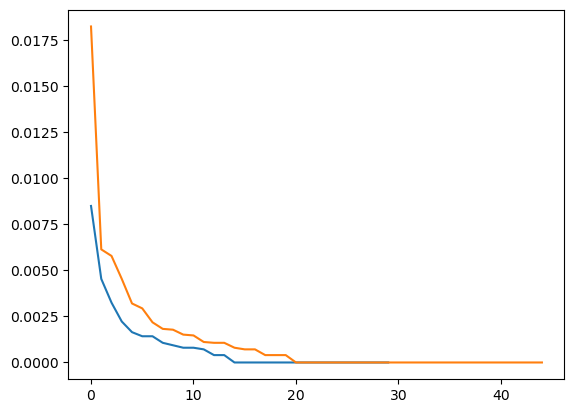

In [48]:
print([f"{x:.4f}" for x in sorted(data3.l.community["pi"].values, reverse=True)])
plt.plot(sorted(data3.l.community["pi"].values, reverse=True))
print([f"{x:.4f}" for x in sorted(data2.l.community["pi"].values, reverse=True)])
plt.plot(sorted(data2.l.community["pi"].values, reverse=True))

In [54]:
avpi2 = np.mean(data2.l.community["pi"])
h12 = iBioGen.util._generalized_hill_number(data2.l.community["local_abund"], order=1)
h22 = iBioGen.util._generalized_hill_number(data2.l.community["local_abund"], order=2)
he2 = h1/iBioGen.util._generalized_hill_number(data2.l.community["local_abund"], order=0)
print(f"{avpi2:.4f} / {h12:.3f} / {h22:.3f} / {he2:.3f}")

avpi3 = np.mean(data3.l.community["pi"])
h13 = iBioGen.util._generalized_hill_number(data3.l.community["local_abund"], order=1)
h23 = iBioGen.util._generalized_hill_number(data3.l.community["local_abund"], order=2)
he3 = h1/iBioGen.util._generalized_hill_number(data3.l.community["local_abund"], order=0)
print(f"{avpi3:.4f} / {h13:.3f} / {h23:.3f} /{he3:.3f}")

0.0012 / 8.054 / 3.350 / 0.179
0.0009 / 3.584 / 1.907 /0.268
